# Assesment Question2

### Reading Q2 2017 Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
df=pd.read_excel('Q2_2017.xlsx')
df.head()

,Invoice Date,Transaction Date,Package Quantity,Oversize Quantity,Tracking Number,Entered Weight,Billed Weight,Package Dimensions,Zone,Charge Description,...,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32
0,2017-08-05,2017-08-03,1,0,1Z6VY3400377024016,16.0,16,NaN,2.0,Ground Commercial Collect,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2017-08-05,2017-08-03,0,0,1Z6VY3400377024016,0.0,0,NaN,2.0,Fuel Surcharge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2017-08-05,2017-08-03,1,0,1Z6VY3400377025195,38.4,39,NaN,2.0,Ground Commercial Collect,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2017-08-05,2017-08-03,0,0,1Z6VY3400377025195,0.0,0,NaN,2.0,Fuel Surcharge,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2017-08-05,2017-08-03,1,0,1Z6VY3400377025239,19.2,20,NaN,2.0,Ground Commercial Collect,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Understanding Data

In [24]:
df.shape

(50561, 33)

In [25]:
df.columns

Index(['Invoice Date', 'Transaction Date', 'Package Quantity',
       'Oversize Quantity', 'Tracking Number', 'Entered Weight',
       'Billed Weight', 'Package Dimensions', 'Zone', 'Charge Description',
       'Net Amount', 'Sender Postal', 'Receiver Postal', 'Detail Keyed Dim',
       'diff', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26',
       'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30',
       'Unnamed: 31', 'Unnamed: 32'],
      dtype='object')

In [238]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50558 entries, 0 to 50557
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Invoice Date        50558 non-null  datetime64[ns]
 1   Transaction Date    50558 non-null  datetime64[ns]
 2   Package Quantity    50558 non-null  int64         
 3   Oversize Quantity   50558 non-null  int64         
 4   Tracking Number     50558 non-null  object        
 5   Entered Weight      50558 non-null  float64       
 6   Billed Weight       50558 non-null  int64         
 7   Zone                50558 non-null  float64       
 8   Charge Description  50558 non-null  object        
 9   Net Amount          50558 non-null  float64       
 10  Sender Postal       44819 non-null  object        
 11  Receiver Postal     50558 non-null  object        
 12  diff                50558 non-null  float64       
 13  new                 50558 non-null  object    

### Cleaning Data

#### Identifying Missing/Null Values

In [27]:
df.isnull().sum()

Invoice Date              0
Transaction Date          0
Package Quantity          0
Oversize Quantity         0
Tracking Number           3
Entered Weight            0
Billed Weight             0
Package Dimensions    49307
Zone                      3
Charge Description        1
Net Amount                0
Sender Postal          5742
Receiver Postal           3
Detail Keyed Dim      45668
diff                      0
Unnamed: 15           50561
Unnamed: 16           50561
Unnamed: 17           50561
Unnamed: 18           50561
Unnamed: 19           50561
Unnamed: 20           50494
Unnamed: 21           50494
Unnamed: 22           50561
Unnamed: 23           50561
Unnamed: 24           50561
Unnamed: 25           50561
Unnamed: 26           50561
Unnamed: 27           50561
Unnamed: 28           50561
Unnamed: 29           50561
Unnamed: 30           50561
Unnamed: 31           50561
Unnamed: 32           50561
dtype: int64

In [29]:
df=df.iloc[:,:15]


In [30]:
df.shape

(50561, 15)

In [32]:
df.isnull().sum()/df.shape[0]*100  ##percent of missing values

Invoice Date           0.000000
Transaction Date       0.000000
Package Quantity       0.000000
Oversize Quantity      0.000000
Tracking Number        0.005933
Entered Weight         0.000000
Billed Weight          0.000000
Package Dimensions    97.519828
Zone                   0.005933
Charge Description     0.001978
Net Amount             0.000000
Sender Postal         11.356579
Receiver Postal        0.005933
Detail Keyed Dim      90.322581
diff                   0.000000
dtype: float64

Since the variables/columns 'Package Dimensions' and 'Detail Keyed Dim' have more than 90 percent missing values,the presence of these columns wouldn't produce fair insights. Hence, they are dropped/not considered for this analysis

In [36]:
df=df.drop(columns=['Package Dimensions','Detail Keyed Dim'])


KeyError: "['Package Dimensions' 'Detail Keyed Dim'] not found in axis"

In [37]:
df

,Invoice Date,Transaction Date,Package Quantity,Oversize Quantity,Tracking Number,Entered Weight,Billed Weight,Zone,Charge Description,Net Amount,Sender Postal,Receiver Postal,diff
0,2017-08-05,2017-08-03,1,0,1Z6VY3400377024016,16.0,16,2.0,Ground Commercial Collect,5.66,08691 2342,8512.0,0.0
1,2017-08-05,2017-08-03,0,0,1Z6VY3400377024016,0.0,0,2.0,Fuel Surcharge,0.27,08691 2342,8512.0,0.0
2,2017-08-05,2017-08-03,1,0,1Z6VY3400377025195,38.4,39,2.0,Ground Commercial Collect,6.42,08691 2342,8512.0,0.6
3,2017-08-05,2017-08-03,0,0,1Z6VY3400377025195,0.0,0,2.0,Fuel Surcharge,0.30,08691 2342,8512.0,0.0
4,2017-08-05,2017-08-03,1,0,1Z6VY3400377025239,19.2,20,2.0,Ground Commercial Collect,5.66,08691 2342,8512.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...
50556,2017-08-05,2017-08-03,0,0,1ZY8X7331599137786,0.0,0,104.0,Fuel Surcharge,4.37,43207,29910.0,0.0
50557,2017-08-05,2017-08-03,1,0,1ZY8X7331599137786,0.0,0,104.0,Next Day Air Early Residential,0.00,43207,29910.0,0.0
50558,2017-08-05,2017-08-05,0,0,NaN,0.0,0,NaN,Service Charge,12.90,NaN,NaN,0.0
50559,2017-08-05,2017-08-05,0,0,NaN,0.0,0,NaN,NaN,0.00,NaN,NaN,0.0


In [38]:
df.isnull().sum()

Invoice Date             0
Transaction Date         0
Package Quantity         0
Oversize Quantity        0
Tracking Number          3
Entered Weight           0
Billed Weight            0
Zone                     3
Charge Description       1
Net Amount               0
Sender Postal         5742
Receiver Postal          3
diff                     0
dtype: int64

In [47]:
df['Sender Postal'].unique()

array(['08691 2342', 8512, nan, 10950, 80435, 11801, 22306, 97660, 22111,
       85123259, 2601, 76441, 5047, 94133, 13052, 98446, 21211, 55416,
       87830, 19121, 76016, 10460, 21204, 85040, 92029, 34685, 13045,
       2482, 1845, 33160, 11768, 8820, 33604, 11102, 43207, 86322, 89135,
       75081, 80005, 90064, 89060, 99336, 66061, 80651, 33062, 98328,
       432075100, 48146, 84302, 55904, 61354, 95340, 44028, 63026, 20659,
       24224, 2119, 58203, 76115, 84082, 6811, 37214, 59716, 30025, 39563,
       19148, 78613], dtype=object)

In [48]:
df['Sender Postal'].fillna(0,inplace=True)

In [49]:
df.isnull().sum()

Invoice Date          0
Transaction Date      0
Package Quantity      0
Oversize Quantity     0
Tracking Number       3
Entered Weight        0
Billed Weight         0
Zone                  3
Charge Description    1
Net Amount            0
Sender Postal         0
Receiver Postal       3
diff                  0
dtype: int64

In [50]:
df.dropna(inplace=True)

In [51]:
df.isnull().sum()

Invoice Date          0
Transaction Date      0
Package Quantity      0
Oversize Quantity     0
Tracking Number       0
Entered Weight        0
Billed Weight         0
Zone                  0
Charge Description    0
Net Amount            0
Sender Postal         0
Receiver Postal       0
diff                  0
dtype: int64

#### Cleaning Postal Columns

In [181]:
df['Receiver Postal']=df['Receiver Postal'].astype('str')

In [154]:
df['Sender Postal']=df['Sender Postal'].astype('str')

In [148]:
long_zip=df['Sender Postal'].str.len()>5

In [149]:
df['Sender Postal'][long_zip].unique()

array(['08691 2342'], dtype=object)

In [172]:
df['Sender Postal']=df['Sender Postal'].str.slice(0,5)

In [173]:
df['Sender Postal'].unique()

array(['08691', '8512', '0', '10950', '80435', '11801', '22306', '97660',
       '22111', '85123', '2601', '76441', '5047', '94133', '13052',
       '98446', '21211', '55416', '87830', '19121', '76016', '10460',
       '21204', '85040', '92029', '34685', '13045', '2482', '1845',
       '33160', '11768', '8820', '33604', '11102', '43207', '86322',
       '89135', '75081', '80005', '90064', '89060', '99336', '66061',
       '80651', '33062', '98328', '48146', '84302', '55904', '61354',
       '95340', '44028', '63026', '20659', '24224', '2119', '58203',
       '76115', '84082', '6811', '37214', '59716', '30025', '39563',
       '19148', '78613'], dtype=object)

In [174]:
small=df['Sender Postal'].str.len()<5

In [175]:
df['Sender Postal'][small]='0'+ df['Sender Postal'][small]

<ipython-input-175-fca943846ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sender Postal'][small]='0'+ df['Sender Postal'][small]


In [176]:
df['Sender Postal'].unique()

array(['08691', '08512', '00', '10950', '80435', '11801', '22306',
       '97660', '22111', '85123', '02601', '76441', '05047', '94133',
       '13052', '98446', '21211', '55416', '87830', '19121', '76016',
       '10460', '21204', '85040', '92029', '34685', '13045', '02482',
       '01845', '33160', '11768', '08820', '33604', '11102', '43207',
       '86322', '89135', '75081', '80005', '90064', '89060', '99336',
       '66061', '80651', '33062', '98328', '48146', '84302', '55904',
       '61354', '95340', '44028', '63026', '20659', '24224', '02119',
       '58203', '76115', '84082', '06811', '37214', '59716', '30025',
       '39563', '19148', '78613'], dtype=object)

In [177]:
rows_w_zero=df['Sender Postal'].str.len()<3

In [178]:
df['Sender Postal'][rows_w_zero]=np.nan

<ipython-input-178-75ce438c42c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Sender Postal'][rows_w_zero]=np.nan


In [179]:
df['Sender Postal'].unique()

array(['08691', '08512', nan, '10950', '80435', '11801', '22306', '97660',
       '22111', '85123', '02601', '76441', '05047', '94133', '13052',
       '98446', '21211', '55416', '87830', '19121', '76016', '10460',
       '21204', '85040', '92029', '34685', '13045', '02482', '01845',
       '33160', '11768', '08820', '33604', '11102', '43207', '86322',
       '89135', '75081', '80005', '90064', '89060', '99336', '66061',
       '80651', '33062', '98328', '48146', '84302', '55904', '61354',
       '95340', '44028', '63026', '20659', '24224', '02119', '58203',
       '76115', '84082', '06811', '37214', '59716', '30025', '39563',
       '19148', '78613'], dtype=object)

In [182]:
df['Receiver Postal'].unique()

array(['8512', '2882', '6810', ..., '68516', '78212', '87031'],
      dtype=object)

In [183]:
rows_small=df['Receiver Postal'].str.len()<5

In [184]:
df['Receiver Postal'][rows_small].unique()

array(['8512', '2882', '6810', '7456', '8857', '3303', '1960', '8734',
       '7062', '7849', '3301', '2301', '7852', '7092', '2760', '1089',
       '1801', '3046', '2093', '4005', '8067', '7751', '7078', '8515',
       '1741', '7080', '2554', '7928', '7006', '3051', '4348', '8533',
       '3104', '5261', '8070', '1810', '7012', '7840', '3884', '2186',
       '2122', '2717', '4756', '2493', '6475', '7036', '7723', '7054',
       '2421', '4105', '7059', '6811', '6457', '2132', '2053', '7060',
       '6415', '6073', '6360', '7094', '4086', '6365', '7644', '3570',
       '7825', '7601', '2828', '5855', '5874', '8088', '8260', '1756',
       '2657', '5301', '2638', '4444', '1040', '4240', '7920', '2852',
       '8816', '7046', '2139', '2121', '4345', '2649', '1545', '7666',
       '1581', '2601', '2724', '2767', '4481', '4605', '8050', '2886',
       '4901', '2842', '2779', '6611', '8831', '3809', '2818', '4459',
       '1921', '2660', '1612', '2563', '4650', '2919', '3801', '2911',
      

In [185]:
df['Receiver Postal'][rows_small]='0'+ df['Receiver Postal'][rows_small]

<ipython-input-185-523a38283990>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Receiver Postal'][rows_small]='0'+ df['Receiver Postal'][rows_small]


In [186]:
df['Receiver Postal'].unique()

array(['08512', '02882', '06810', ..., '68516', '78212', '87031'],
      dtype=object)

### Analysing Data

In [287]:
df.describe()

,Package Quantity,Oversize Quantity,Entered Weight,Billed Weight,Zone,Net Amount,diff,year,month
count,50558.000000,50558.0,50558.000000,50558.000000,50558.000000,50558.000000,50558.000000,50558.0,50558.000000
mean,0.413921,0.0,3.252087,4.248487,9.403082,2.890144,0.996400,2017.0,7.373373
std,0.492740,0.0,8.355519,10.180587,29.856699,4.951366,4.794032,0.0,0.484073
min,-1.000000,0.0,0.000000,0.000000,0.000000,-56.000000,-16.000000,2017.0,6.000000
25%,0.000000,0.0,0.000000,0.000000,2.000000,0.350000,0.000000,2017.0,7.000000
50%,0.000000,0.0,0.000000,0.000000,4.000000,1.870000,0.000000,2017.0,7.000000
75%,1.000000,0.0,1.700000,3.000000,5.000000,5.660000,0.300000,2017.0,8.000000
max,1.000000,0.0,147.800000,157.000000,308.000000,150.000000,147.000000,2017.0,8.000000


#### Number of Transactions per Zone

In [109]:
df['Zone'].value_counts()

2.0      12669
4.0       9822
3.0       8838
5.0       6918
8.0       5112
6.0       3286
7.0       2070
102.0      235
206.0      194
208.0      183
134.0      154
104.0      145
205.0      127
103.0      119
105.0       69
207.0       56
108.0       55
308.0       54
106.0       53
0.0         50
44.0        46
138.0       38
226.0       36
135.0       35
136.0       28
133.0       26
107.0       20
46.0        19
126.0       17
307.0       16
204.0       16
224.0       14
132.0       10
306.0        8
137.0        8
305.0        4
203.0        3
124.0        3
304.0        2
Name: Zone, dtype: int64

#### Net Amount for Zone (Top 10)

In [188]:
zone_amount=df.groupby('Zone')['Net Amount'].sum().sort_values(ascending=False).reset_index()

In [189]:
zone_amount.head(10)

,Zone,Net Amount
0,2.0,33969.38
1,4.0,24708.76
2,3.0,23470.28
3,5.0,17779.72
4,8.0,17058.12
5,6.0,8823.91
6,7.0,6081.60
7,206.0,1877.69
8,104.0,1258.57
9,208.0,1159.93


#### Number of transactions per Charge

In [54]:
df['Charge Description'].value_counts()

Fuel Surcharge                                   14866
Ground Residential                               10005
Residential Surcharge                             8253
Ground Commercial                                 7136
Delivery Area Surcharge - Extended                2558
                                                 ...  
Address Correction 2nd Day Air                       1
3 Day Select Undeliverable Return                    1
Next Day Air Early Commercial                        1
GSR Next Day Air Residential                         1
Not Previously Billed Delivery Area Surcharge        1
Name: Charge Description, Length: 63, dtype: int64

In [297]:
df['Charge Description'].value_counts()[:10]

Fuel Surcharge                               14866
Ground Residential                           10005
Residential Surcharge                         8253
Ground Commercial                             7136
Delivery Area Surcharge - Extended            2558
Delivery Area Surcharge                       1901
Residential Adjustment                        1680
Shipping Charge Correction Fuel Surcharge     1271
Shipping Charge Correction Ground             1132
Additional Handling                            423
Name: Charge Description, dtype: int64

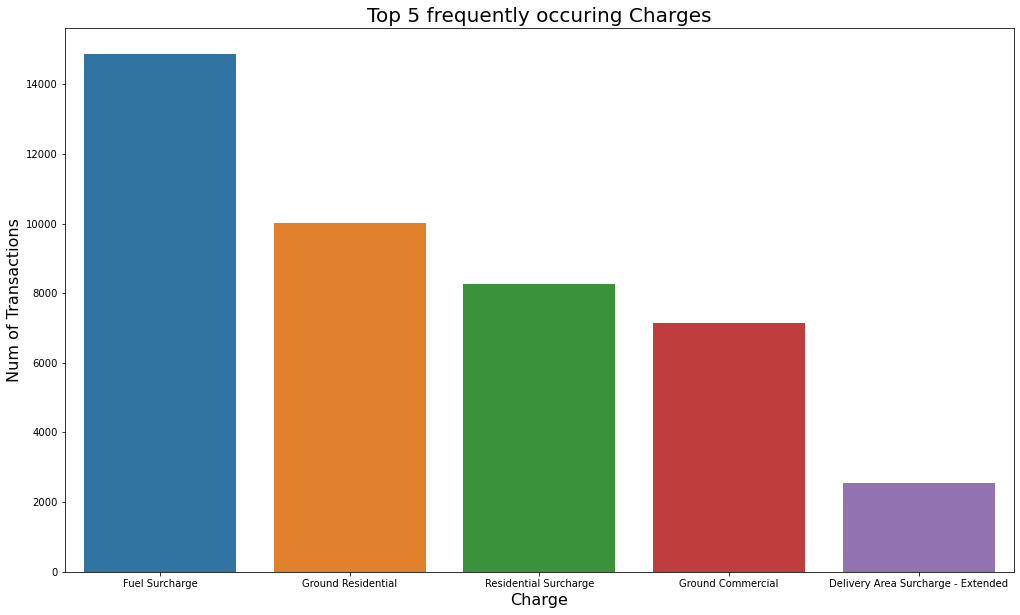

In [296]:
plt.figure(figsize=(17,10))
sns.barplot(x=df['Charge Description'].value_counts().index[0:5],y=df['Charge Description'].value_counts()[0:5],data=df)
plt.title("Top 5 frequently occuring Charges", fontsize=20)
plt.xlabel("Charge", fontsize=16)
plt.ylabel("Num of Transactions", fontsize=16)
plt.show()

#### Net amount for Charge Description(top 10)

In [268]:
net_amt_charge=df.groupby('Charge Description')['Net Amount'].sum().sort_values(ascending=False).reset_index()

In [269]:
net_amt_charge.head(10)


,Charge Description,Net Amount
0,Ground Residential,50975.77
1,Ground Commercial,40336.99
2,Residential Surcharge,15497.73
3,Fuel Surcharge,5924.75
4,Delivery Area Surcharge - Extended,5250.69
5,Shipping Charge Correction Large Package Surch...,4424.00
6,Residential Adjustment,3826.60
7,Delivery Area Surcharge,3204.31
8,Next Day Air Commercial,2805.03
9,Shipping Charge Correction Ground,2525.83


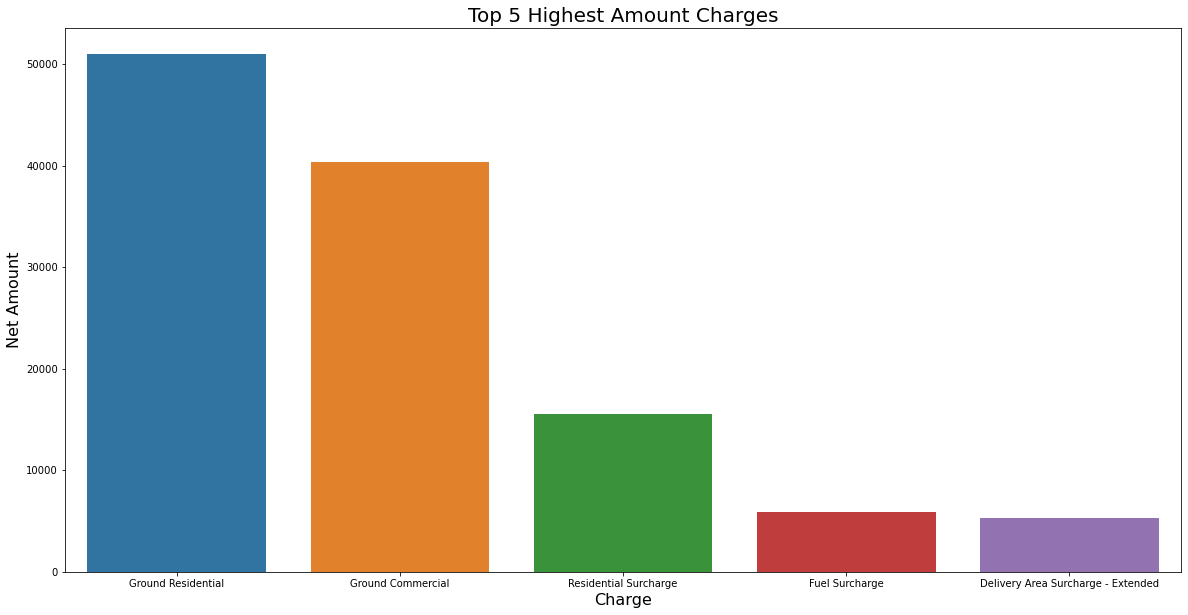

In [274]:
plt.figure(figsize=(20,10))
sns.barplot(x=net_amt_charge['Charge Description'][0:5],y=net_amt_charge['Net Amount'][0:5],data=net_amt_charge)
plt.title("Top 5 Highest Amount Charges", fontsize=20)
plt.xlabel("Charge", fontsize=16)
plt.ylabel("Net Amount", fontsize=16)
plt.show()

#### Average Net Amount for Charges

In [275]:
avg_amt_charge=df.groupby('Charge Description')['Net Amount'].mean().sort_values(ascending=False).reset_index()

In [298]:
avg_amt_charge.columns=['Charge Description','Avg Net Amount']

In [300]:
avg_amt_charge.head(10)

,Charge Description,Avg Net Amount
0,Shipping Charge Correction Over Maximum Size,150.000000
1,Shipping Charge Correction Over Maximum Length,150.000000
2,Next Day Air Early Commercial,80.280000
3,Shipping Charge Correction Large Package Surch...,44.686869
4,Early Surcharge,30.000000
5,Large Package Surcharge,28.000000
6,Next Day Air Early Residential,27.130000
7,Return To Sender - Phone Request,19.400000
8,Reroute - Phone Request,19.400000
9,Next Day Air Commercial,19.345034


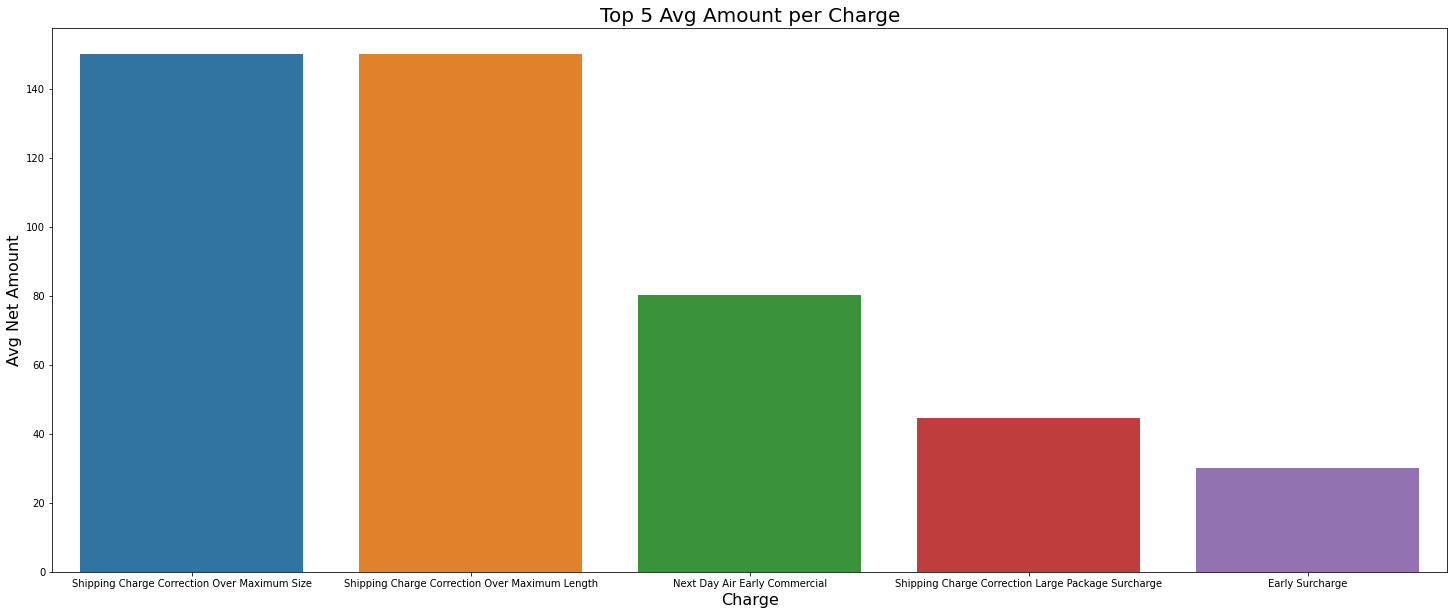

In [299]:
plt.figure(figsize=(25,10))
sns.barplot(x=avg_amt_charge['Charge Description'][0:5],y=avg_amt_charge['Avg Net Amount'][0:5],data=avg_amt_charge)
plt.title("Top 5 Avg Amount per Charge", fontsize=20)
plt.xlabel("Charge", fontsize=16)
plt.ylabel("Avg Net Amount", fontsize=16)
plt.show()

#### Analysis of 'diff'
##### diff- Column that contains the difference between the 'Entered Weight' and 'Billed Weight'

In [219]:
df['diff'].sum()

50376.0

In [220]:
df['diff'].mean()

0.9964001740574844

<AxesSubplot:>

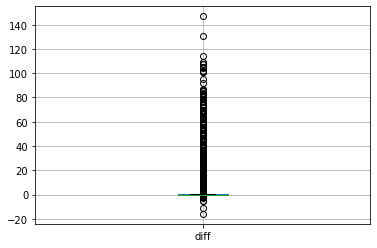

In [221]:
df.boxplot('diff')

#### Relationship between Billed Weight and Entered Weight

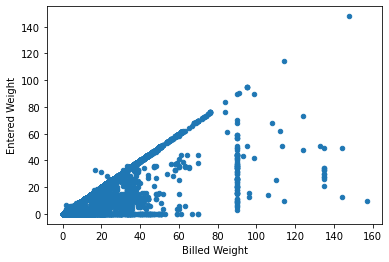

In [222]:
weight=df.plot.scatter(x='Billed Weight',y='Entered Weight')

#### Relationship between Billed Weight and Net Amount

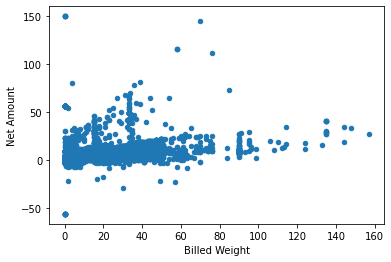

In [223]:
bweight_amount=df.plot.scatter(x='Billed Weight',y='Net Amount')

#### Relationship between Entered Weight and Net Amount

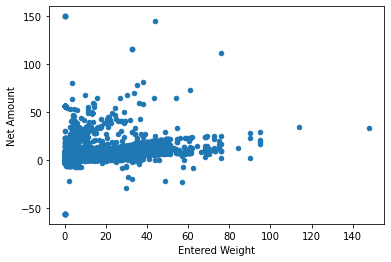

In [224]:
bweight_amount=df.plot.scatter(x='Entered Weight',y='Net Amount')

#### Takeaways
There is a strong corelation between billed weight and entered weight. Both of them have some correlation on the net amount.

#### Correlation Analysis

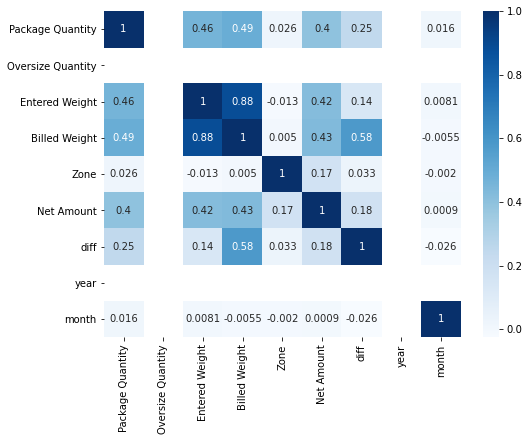

In [290]:
plt.figure(figsize=[8,6])
sns.heatmap(df.corr(), annot=True, cmap='Blues')
plt.show()

#### Analysis of 'Transaction Date'

In [225]:
import datetime

In [228]:
df['month'] = pd.DatetimeIndex(df['Transaction Date']).month
df.head()

,Invoice Date,Transaction Date,Package Quantity,Oversize Quantity,Tracking Number,Entered Weight,Billed Weight,Zone,Charge Description,Net Amount,Sender Postal,Receiver Postal,diff,new,Distance,year,month
0,2017-08-05,2017-08-03,1,0,1Z6VY3400377024016,16.0,16,2.0,Ground Commercial Collect,5.66,08691,08512,0.0,08691,[],2017,8
1,2017-08-05,2017-08-03,0,0,1Z6VY3400377024016,0.0,0,2.0,Fuel Surcharge,0.27,08691,08512,0.0,08691,[],2017,8
2,2017-08-05,2017-08-03,1,0,1Z6VY3400377025195,38.4,39,2.0,Ground Commercial Collect,6.42,08691,08512,0.6,08691,[],2017,8
3,2017-08-05,2017-08-03,0,0,1Z6VY3400377025195,0.0,0,2.0,Fuel Surcharge,0.30,08691,08512,0.0,08691,[],2017,8
4,2017-08-05,2017-08-03,1,0,1Z6VY3400377025239,19.2,20,2.0,Ground Commercial Collect,5.66,08691,08512,0.8,08691,[],2017,8


In [229]:
df['Transaction Date'].max()

Timestamp('2017-08-05 00:00:00')

In [230]:
df['Transaction Date'].min()

Timestamp('2017-06-19 00:00:00')

#### Number of monthly transactions

In [253]:
month_n=df.groupby(['month'])['Transaction Date'].count().reset_index()

In [279]:
month_n.columns=['month','Number of Transactions']

In [283]:
month_n.head()

,month,Number of Transactions
0,6,20.08
1,7,91413.63
2,8,54686.18


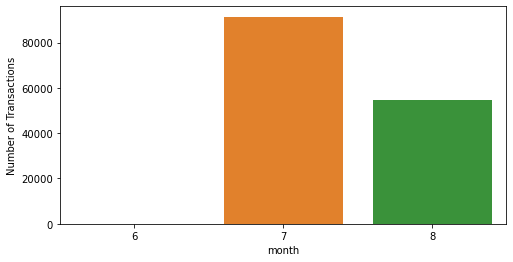

In [282]:
plt.figure(figsize=(8,4))
sns.barplot(x=month_n['month'],y=month_n['Number of Transactions'],data=month_n)
plt.show()

#### Net Amount per Month

In [284]:
month_n_amt=df.groupby(['month'])['Net Amount'].sum().reset_index()

In [285]:
month_n_amt.head()

,month,Net Amount
0,6,20.08
1,7,91413.63
2,8,54686.18


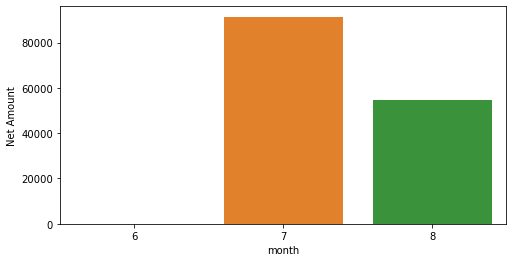

In [286]:
plt.figure(figsize=(8,4))
sns.barplot(x=month_n_amt['month'],y=month_n_amt['Net Amount'],data=month_n_amt)
plt.show()

In [244]:
month_t=df.groupby(['month','Charge Description'])['Net Amount'].sum().reset_index()

In [278]:
month_t

,month,Charge Description,Net Amount
0,6,Not Previously Billed Delivery Area Surcharge,1.95
1,6,Not Previously Billed Fuel Surcharge,0.81
2,6,Not Previously Billed Ground Residential,11.32
3,6,Not Previously Billed Residential Surcharge,3.74
4,6,Shipping Charge Correction Fuel Surcharge,0.11
...,...,...,...
91,8,Shipping Charge Correction Ground Undeliverabl...,1.30
92,8,Shipping Charge Correction Large Package Surch...,1288.00
93,8,Shipping Charge Correction Next Day Air,172.77
94,8,Shipping Charge Correction Next Day Air Saver,89.07


In [251]:
month_t[month_t['Charge Description']=='Fuel Surcharge']

,month,Charge Description,Net Amount
16,7,Fuel Surcharge,3685.49
69,8,Fuel Surcharge,2239.26


In [252]:
month_t[month_t['Charge Description']=='Ground Residential']

,month,Charge Description,Net Amount
26,7,Ground Residential,35034.34
72,8,Ground Residential,15941.43


#### Avg Net Amount per Month

In [291]:
month_t_avg=df.groupby(['month','Charge Description'])['Net Amount'].mean().reset_index()

In [292]:
month_t_avg[month_t_avg['Charge Description']=='Fuel Surcharge']

,month,Charge Description,Net Amount
16,7,Fuel Surcharge,0.412616
69,8,Fuel Surcharge,0.377361


In [293]:
month_t_avg[month_t_avg['Charge Description']=='Ground Residential']

,month,Charge Description,Net Amount
26,7,Ground Residential,5.226666
72,8,Ground Residential,4.827810
